### Haseeb Khan 
###### Email :  haseebkhan8099@gmail.com
###### LinkedIn : https://www.linkedin.com/in/haseebkhanmanuu/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

# Q1: What is the total number of goals scored in the entire dataset?




In [5]:
total_goals = df['Goals'].sum()

print("Total Goals:", total_goals)

Total Goals: 7795


# Q2: Which player has scored the most goals as a substitution

In [18]:
substitution_df = df[df['Substitution '] > 0]

# Find the player with the most goals among substitutions
player_most_goals_substitution = substitution_df.loc[substitution_df['Goals'].idxmax(), 'Player Names']

print("Player with the most goals as a substitution:", player_most_goals_substitution)

Player with the most goals as a substitution: Lionel Messi


# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [19]:
top_players = df.nlargest(5, 'Goals')

# Calculate the total number of goals scored by the top 5 players
total_goals_top_players = top_players['Goals'].sum()

# Display the top players and total goals
print("Top 5 Players with the Most Goals:")
print(top_players[['Player Names', 'Goals']])
print("\nTotal Goals Scored by Top 5 Players:", total_goals_top_players)

Top 5 Players with the Most Goals:
          Player Names  Goals
5    Cristiano Ronaldo     42
12        Lionel Messi     37
195       Lionel Messi     36
317        Carlos Vela     36
391      Ciro Immobile     36

Total Goals Scored by Top 5 Players: 187


# Q4: What are the top 10 countries with the most number of players in the dataset?

In [20]:
top_countries = df['Country'].value_counts().nlargest(10)

# Display the top 10 countries and their player counts
print("Top 10 Countries with the Most Number of Players:")
print(top_countries)

Top 10 Countries with the Most Number of Players:
Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: Country, dtype: int64


# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [21]:
upper_quantile = df['Mins'].quantile(0.99)
lower_quantile = df['Mins'].quantile(0.01)

# Create a new DataFrame after removing outliers
df_no_outliers = df[(df['Mins'] >= lower_quantile) & (df['Mins'] <= upper_quantile)]

# Find the difference in the number of rows
num_rows_before = len(df)
num_rows_after = len(df_no_outliers)
rows_difference = num_rows_before - num_rows_after

# Display the results
print("Number of Rows Before Removing Outliers:", num_rows_before)
print("Number of Rows After Removing Outliers:", num_rows_after)
print("Difference in Number of Rows:", rows_difference)

Number of Rows Before Removing Outliers: 660
Number of Rows After Removing Outliers: 646
Difference in Number of Rows: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [22]:
top_players_goals = df.groupby('Player Names')['Goals'].sum().nlargest(5)

# Display the top 5 players in descending order
print("Top 5 Players with the Maximum Number of Goals Throughout All Years:")
print(top_players_goals)

Top 5 Players with the Maximum Number of Goals Throughout All Years:
Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

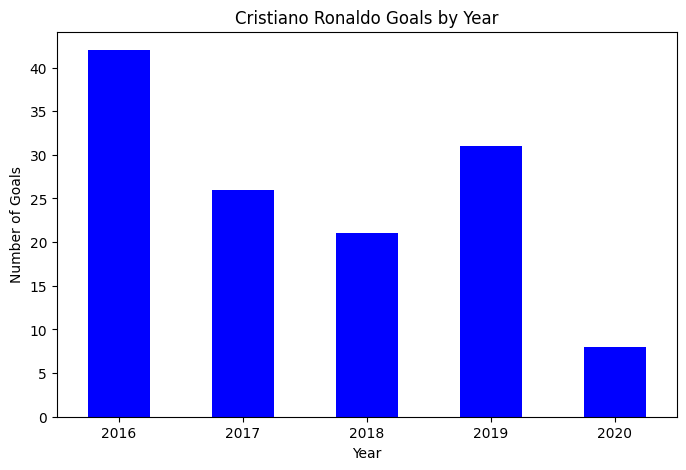

Cristiano Ronaldo scored the most goals in the year: 2016


In [25]:
# Filter data for Cristiano Ronaldo
ronaldo_data = df[df['Player Names'] == 'Cristiano Ronaldo']

# Check if there are goals for Ronaldo
if not ronaldo_data.empty:
    # Group by year and sum the goals
    ronaldo_goals_by_year = ronaldo_data.groupby('Year')['Goals'].sum()

    # Find the year with the most goals
    most_goals_year = ronaldo_goals_by_year.idxmax()

    # Plotting the bar plot
    plt.figure(figsize=(8, 5))
    ronaldo_goals_by_year.plot(kind='bar', color='blue')
    plt.title('Cristiano Ronaldo Goals by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Goals')
    plt.xticks(rotation=0)
    plt.show()

    print(f"Cristiano Ronaldo scored the most goals in the year: {most_goals_year}")
else:
    print("Cristiano Ronaldo has not scored any goals in the dataset.")


# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

Goals in 2019:
Ronaldo: 31
Messi: 25


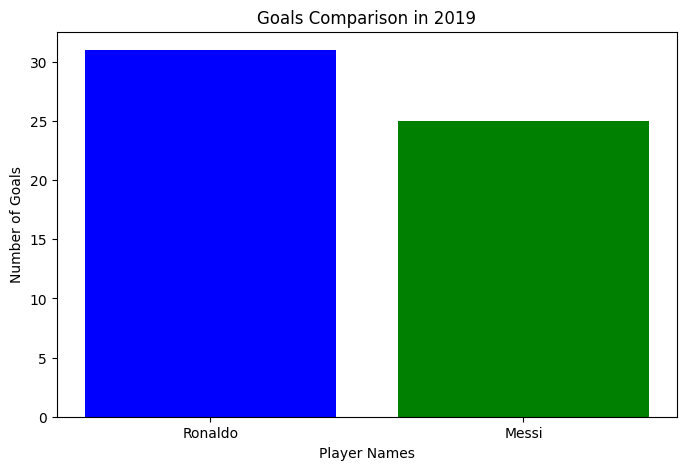

In [26]:
# Filter data for Ronaldo and Messi in 2019
ronaldo_2019 = df[(df['Player Names'] == 'Cristiano Ronaldo') & (df['Year'] == 2019)]
messi_2019 = df[(df['Player Names'] == 'Lionel Messi') & (df['Year'] == 2019)]

# Print goals for Ronaldo and Messi in 2019
print("Goals in 2019:")
print("Ronaldo:", ronaldo_2019['Goals'].values[0] if not ronaldo_2019.empty else 0)
print("Messi:", messi_2019['Goals'].values[0] if not messi_2019.empty else 0)

# Visualize the comparison using a bar plot
if not ronaldo_2019.empty and not messi_2019.empty:
    comparison_data = {'Player Names': ['Ronaldo', 'Messi'],
                       'Goals': [ronaldo_2019['Goals'].values[0], messi_2019['Goals'].values[0]]}

    comparison_df = pd.DataFrame(comparison_data)

    plt.figure(figsize=(8, 5))
    plt.bar(comparison_df['Player Names'], comparison_df['Goals'], color=['blue', 'green'])
    plt.title('Goals Comparison in 2019')
    plt.xlabel('Player Names')
    plt.ylabel('Number of Goals')
    plt.show()
else:
    print("Insufficient data for the comparison in 2019.")


# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

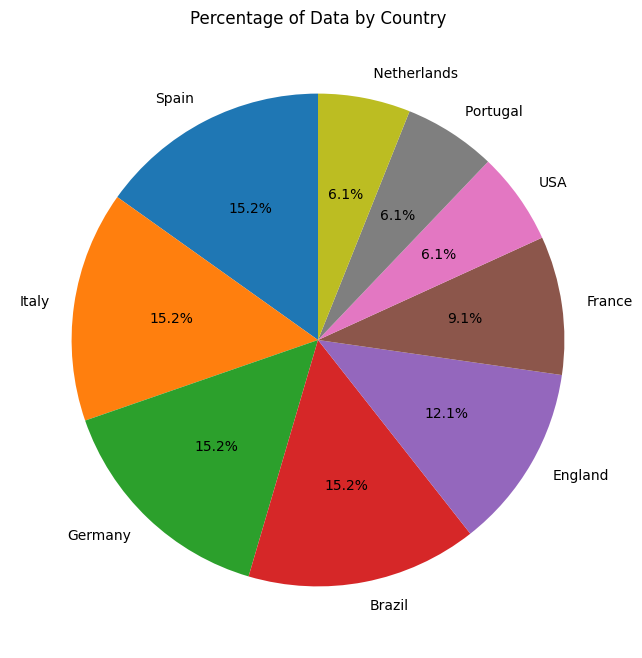

In [27]:
# Calculate the percentage of data for each country
country_percentage = df['Country'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_percentage, labels=country_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Data by Country')
plt.show()


# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

C:\Users\hasee\AppData\Local\Temp\ipykernel_15680\1320690974.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


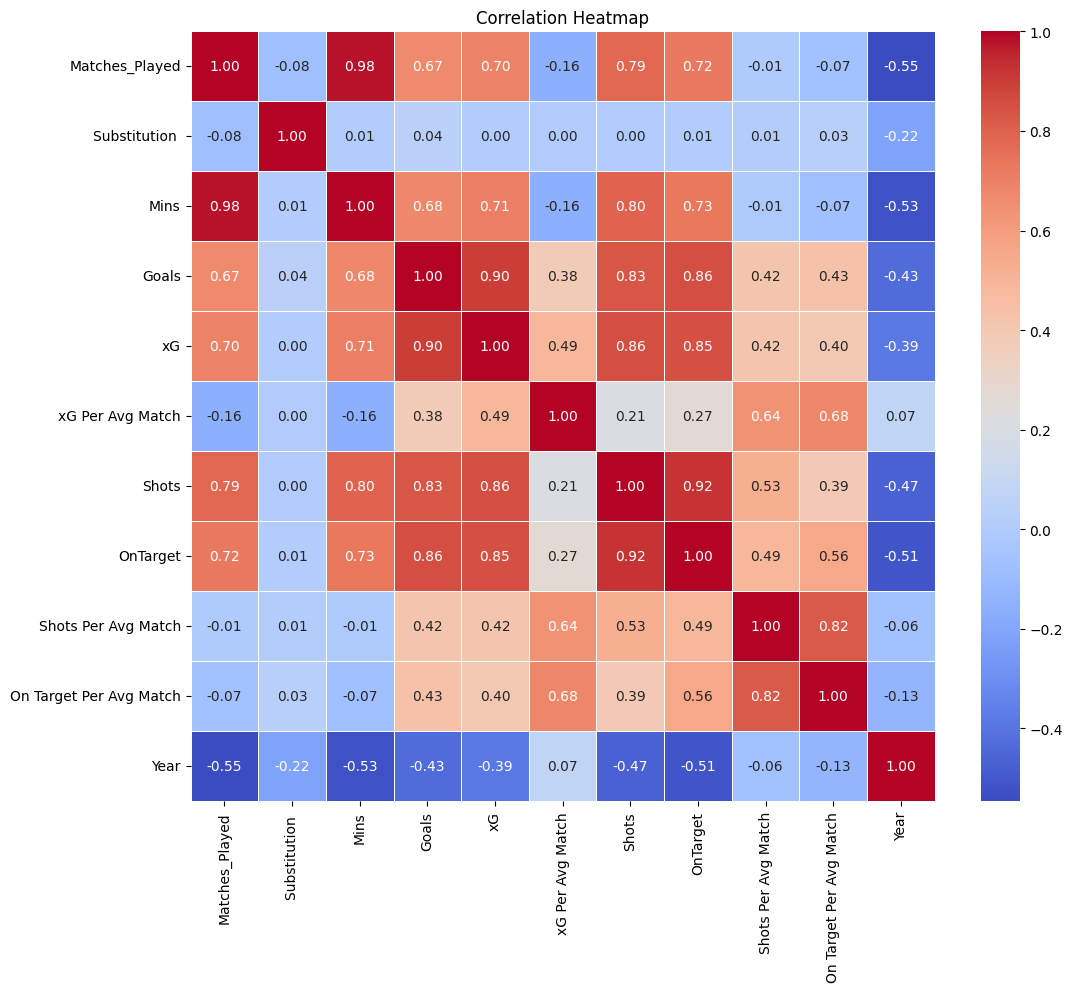

In [28]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [29]:

# Filter data for the year 2020
df_2020 = df[df['Year'] == 2020]

# Find the country with the maximum median OnTarget Shots
max_median_country = df_2020.groupby('Country')['OnTarget'].median().idxmax()

print("Country with the maximum median OnTarget Shots in 2020:", max_median_country)


Country with the maximum median OnTarget Shots in 2020:  Netherlands


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [32]:
# Filter players who have played more than 30 games
df_filtered = df[df['Matches_Played'] > 30]

# Calculate Goals per minute
df_filtered['Goals_Per_Minute'] = df_filtered['Goals'] / df_filtered['Mins']

# Calculate the mean of Goals per minute and sort the values
result = df_filtered.groupby('Player Names')['Goals_Per_Minute'].mean().sort_values(ascending=False)

print("Player with the best average Goals per minute:", result.idxmax())


Player with the best average Goals per minute: Carlos Vela


C:\Users\hasee\AppData\Local\Temp\ipykernel_15680\2981072174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Goals_Per_Minute'] = df_filtered['Goals'] / df_filtered['Mins']


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [33]:
# Calculate missed shots
df['Missed_Shots'] = df['Shots'] - df['OnTarget']

# Find the player with the least and most missed shots
player_least_missed_shots = df.loc[df['Missed_Shots'].idxmin(), 'Player Names']
player_most_missed_shots = df.loc[df['Missed_Shots'].idxmax(), 'Player Names']

print("Player with the least missed shots:", player_least_missed_shots)
print("Player with the most missed shots:", player_most_missed_shots)


Player with the least missed shots: Esteban Burgos
Player with the most missed shots: Cristiano Ronaldo


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

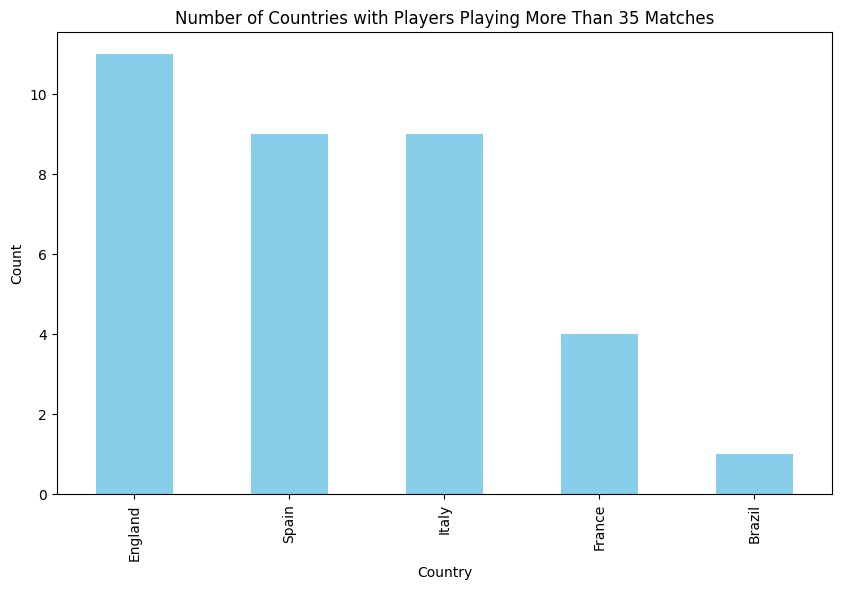

Number of countries with players who played more than 35 matches: 5


In [34]:
# Filter countries with players who played more than 35 matches
df_filtered_countries = df[df['Matches_Played'] > 35]

# Count the number of unique countries
country_count = df_filtered_countries['Country'].nunique()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
df_filtered_countries['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Countries with Players Playing More Than 35 Matches')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

print("Number of countries with players who played more than 35 matches:", country_count)


# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

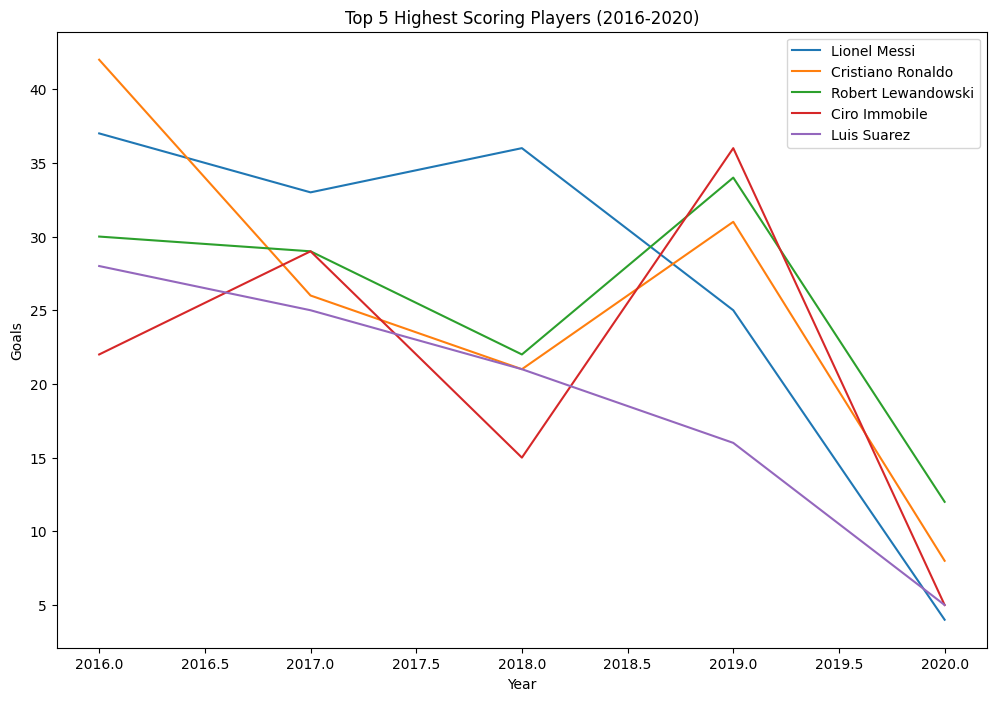

In [35]:
# Filter data for the years 2016-2020
df_filtered_years = df[df['Year'].between(2016, 2020)]

# Get the top 5 highest-scoring players
top_players = df_filtered_years.groupby('Player Names')['Goals'].sum().nlargest(5).index

# Filter data for the top players
df_top_players = df_filtered_years[df_filtered_years['Player Names'].isin(top_players)]

# Plotting the line chart
plt.figure(figsize=(12, 8))
for player in top_players:
    player_data = df_top_players[df_top_players['Player Names'] == player]
    plt.plot(player_data['Year'], player_data['Goals'], label=player)

plt.title('Top 5 Highest Scoring Players (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.legend()
plt.show()
